In [1]:
#to load mnist data
from tensorflow.keras.datasets import mnist

#to load numpy package
import numpy as np 

#to plot data
import matplotlib.pyplot as plt

#network architecture
from tensorflow.keras.models import Model, Sequential, load_model
#OR tensorflow.keras import models + network = models.Sequential() 
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Dense, Activation
# OR from tensorflow.keras import layers + network.add(layers.Dense(...))

#to prep labels into one-hot-vectors
from tensorflow.keras.utils import to_categorical

#used during model training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.optimizers import Adam
import scipy as sp
import pandas as pd
import sklearn

In [2]:
#loads the MNIST data
#the model will learn from the training set
#the model will be tested on the test set
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
#this is what shape the training data is
print(train_labels.shape)

(60000,)


In [4]:
#passes the training data to the to_categorical function
#which converts into one_hot_vectors
#For example, it is basically its converting the number 3 into [0,0,0,1,0,0,0,0,0,0] 
train_labelsc = to_categorical(train_labels)
train_labelsc.shape

(60000, 10)

In [5]:
#prints the label for training data in numerical form
print(train_labels[2])
#prints the one-hot-vector 
print(train_labelsc[2])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


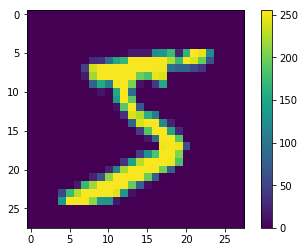

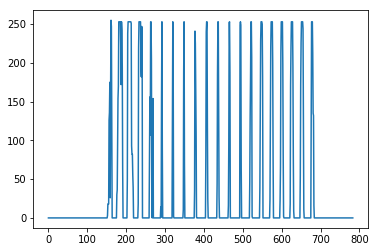

255
uint8


In [6]:
#to inspect data
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

# plt.imshow(train_images[0].reshape((28*28,1)))
# plt.colorbar()
# plt.show()

plt.plot(train_images[0].reshape((28*28)))
plt.show()

print(train_images.max())
print(train_images.dtype)

In [7]:
#creates new model
network = Sequential()

#Network Achitecture
#model is a sequence of two dense layers
#(densely connected, or fully connected neural layers)
#the second layer (softmax) will return an array of 10
#prob score, each score will be the prob that current
#digit image belongs to 1 of 10 digit classes
network.add(Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(Dense(10, activation = 'softmax'))

#Compiliation Step
#includes:
# 1) Loss Function - this is how the network will
#be able to measure its performance on the
#training data, so it can steer itself in the
#right direction
# 2) Optimizer - this is how the network will
#update itself, based on data it sees and the
#loss function
# 3) Metrics - this is for monitoring and is 
#used during training and testing, only monitor
#the accuracy (accuracy is the fraction of images
#that are correctly classified)
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

#Reshaping the Data Step
# A)before training, need to pre-process the data
#by RESHAPING into a shape the network expects
#and SCALING so all values are in binary intervals
# B)Previously, the training images in 
#   1) Array of shape: (60000, 28, 28)
#   2) Type:           uint8
#   3) Interval:       [0, 255]
# C)Transformed to
#   1)Array:           (60000, 28*28) <- a 2D vector and 60K training images
#   2)Type:            float32
#   3)Interval:        [0, 1]
#TRAINING
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
#TESTING
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

#Preparing the Labels Step
#need to categorically encode the labels
#TRAINING
train_labels = to_categorical(train_labels)
#TESTING
test_labels = to_categorical(test_labels)

#Callbacks 
call1 = ModelCheckpoint(filepath='best_model.hdf5',monitor='val_loss',save_best_only=True)
call2 = EarlyStopping(monitor='val_loss', patience=10)
callbacks=[call1,call2]


#Ready to Train the Network Step
#in Keras, to train network, is done via a call
#to the networks 'fit' method (namely, to fit the 
#model to its training data)
#2 values will be displayed during training;
# 1)the loss of the network over training data
# 2)the accuracy of the network over the training data
loss=network.fit(train_images, train_labels, epochs = 50, batch_size = 128,validation_split=0.2,callbacks=callbacks)

#Check How the Model Performs on Test Set
#if the test set accuracy is lower than the training
#set accuracy, the gap is an ex of OVERFITTING
#(this is when a ML models tend to perform worse
#on new data than on the training data)
network = load_model('best_model.hdf5')#model that performed best
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.2807 - acc: 0.9190 - val_loss: 0.1553 - val_acc: 0.9559
Epoch 2/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.1166 - acc: 0.9657 - val_loss: 0.0993 - val_acc: 0.9704
Epoch 3/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0760 - acc: 0.9778 - val_loss: 0.0972 - val_acc: 0.9719
Epoch 4/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0555 - acc: 0.9836 - val_loss: 0.0895 - val_acc: 0.9738
Epoch 5/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0413 - acc: 0.9879 - val_loss: 0.0808 - val_acc: 0.9762
Epoch 6/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0308 - acc: 0.9914 - val_loss: 0.0859 - val_acc: 0.9763
Epoch 7/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0233 - acc: 0.9932 - val_loss: 0.0798 - val_acc

In [8]:
print(loss.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


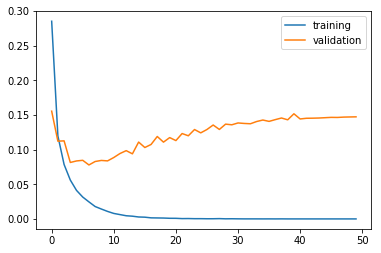

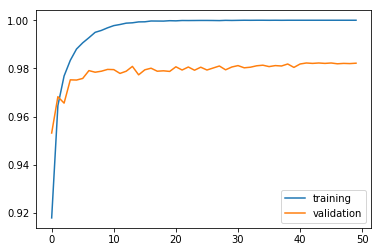

In [7]:
plt.plot(loss.history['loss'],label='training')
plt.plot(loss.history['val_loss'],label='validation')
plt.legend()
plt.show()

plt.plot(loss.history['acc'],label='training')
plt.plot(loss.history['val_acc'],label='validation')
plt.legend()
plt.show()